Data preprocessing

In [20]:
import pandas as pd

df = pd.read_csv('bbc_weather_bat_yam.csv')
df.head()

,Day,High Temperature (°C),Low Temperature (°C),Condition
0,Tonight,NaN,NaN,Clear Sky
1,Tue 17th,20°,9°,Sunny
2,Wed 18th,22°,9°,Sunny
3,Thu 19th,22°,10°,Sunny
4,Fri 20th,18°,12°,Light Rain Showers


In [22]:
df['High Temperature (°C)'] = df['High Temperature (°C)'].str.replace('°', '').astype(float)
df['Low Temperature (°C)'] = df['Low Temperature (°C)'].str.replace('°', '').astype(float)
df['High Temperature (°C)'].fillna(df['High Temperature (°C)'].mean(), inplace=True)
df['Low Temperature (°C)'].fillna(df['Low Temperature (°C)'].mean(), inplace=True)
df['Condition'] = df['Condition'].str.strip()

<ipython-input-22-a7d15fdc5bd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['High Temperature (°C)'].fillna(df['High Temperature (°C)'].mean(), inplace=True)
<ipython-input-22-a7d15fdc5bd7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [23]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [24]:
from datetime import datetime, timedelta
today = datetime.today()

df['day'] = df['day'].replace("Tonight", today.strftime('%d.%m.%Y'))
for i in range(1, len(df)):
    day_date = today + timedelta(days=i)
    df.at[i, 'day'] = day_date.strftime('%d.%m.%Y')

In [25]:
df.head()

,day,high_temperature_(°c),low_temperature_(°c),condition
0,16.12.2024,18.769231,10.461538,Clear Sky
1,17.12.2024,20.000000,9.000000,Sunny
2,18.12.2024,22.000000,9.000000,Sunny
3,19.12.2024,22.000000,10.000000,Sunny
4,20.12.2024,18.000000,12.000000,Light Rain Showers


Basic analysis, calculating averages, totals, trends over time.

In [41]:
df.describe()

,high_temperature_(°c),low_temperature_(°c)
count,14.000000,14.000000
mean,18.769231,10.461538
std,1.716609,1.216261
min,17.000000,9.000000
25%,17.250000,9.250000
50%,18.384615,10.230769
75%,19.750000,11.750000
max,22.000000,12.000000


Mean temperature for 2 weeks is 18 degrees at daytime, and 10 degrees at night. Highest daily temperature is 22 degrees, lowest - 9

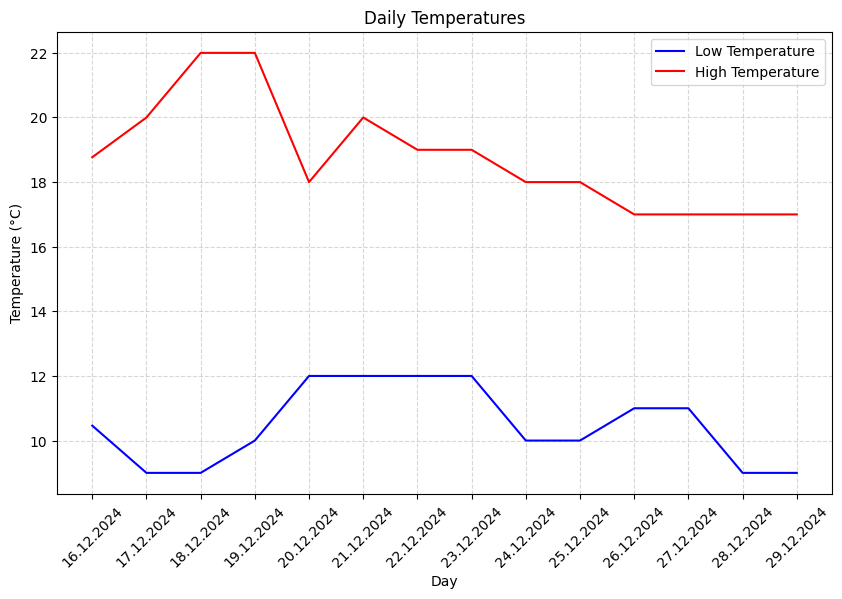

In [35]:
# Examples of visualizations can include line plots for trends over time, bar charts for comparing categories, or heatmaps for showing data density.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(df['day'], df['low_temperature_(°c)'], color='blue', label='Low Temperature')
plt.plot(df['day'], df['high_temperature_(°c)'], color='red', label='High Temperature')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperatures')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

we see that there is a trend towards a decrease in temperature during the day, while the temperature at night remains at the same level and does not fall by more than 1 degree during the day.

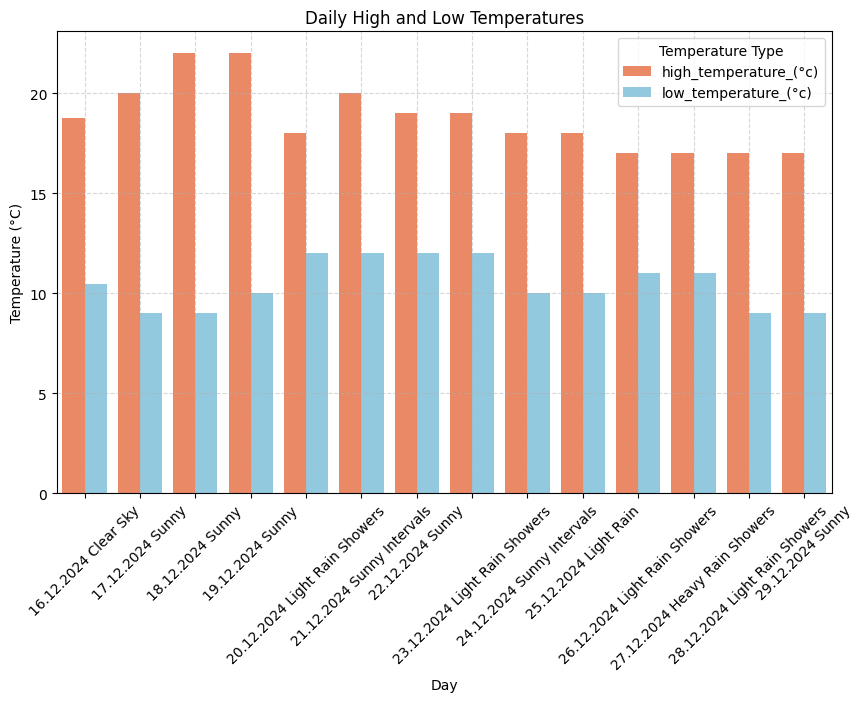

In [42]:
df_melted = pd.melt(df, id_vars=["day", "condition"], value_vars=["high_temperature_(°c)", "low_temperature_(°c)"],
                    var_name="Temperature Type", value_name="Temperature (°C)")
df_melted["Day with Condition"] = df_melted["day"] + " " + df_melted["condition"]

plt.figure(figsize=(10, 6))
custom_palette = {"high_temperature_(°c)": "coral", "low_temperature_(°c)": "skyblue"}
sns.barplot(x="Day with Condition", y="Temperature (°C)", hue="Temperature Type", data=df_melted, palette=custom_palette)

plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily High and Low Temperatures')
plt.xticks(rotation=45)
plt.legend(title='Temperature Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This graph shows that rain is expected in the next two weeks (6 days out of 14), however, the presence of rain does not greatly affect the temperature change and it will remain at the same level with a moderate downward trend of 1 degree per day